In [17]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor
# from sklearn import metrics


In [11]:
sales_data = pd.read_csv('advertising.csv')

In [12]:
sales_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [13]:
sales_data.shape

(200, 4)

In [14]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [15]:
sales_data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [16]:
sales_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


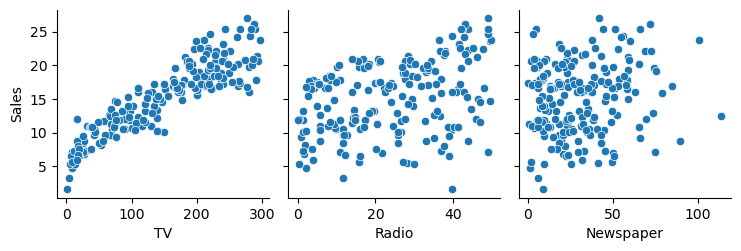

In [18]:
sns.pairplot(sales_data, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

<Axes: ylabel='Frequency'>

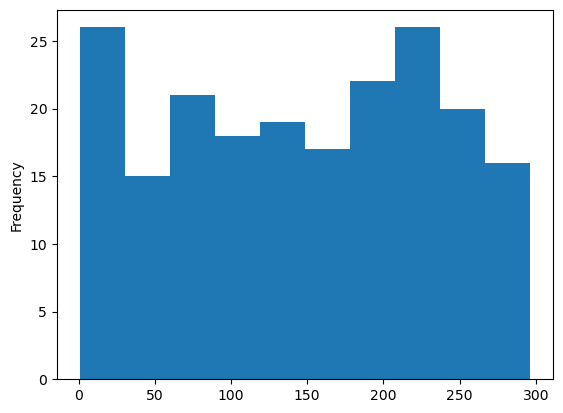

In [19]:
sales_data['TV'].plot.hist(bins=10)

<Axes: ylabel='Frequency'>

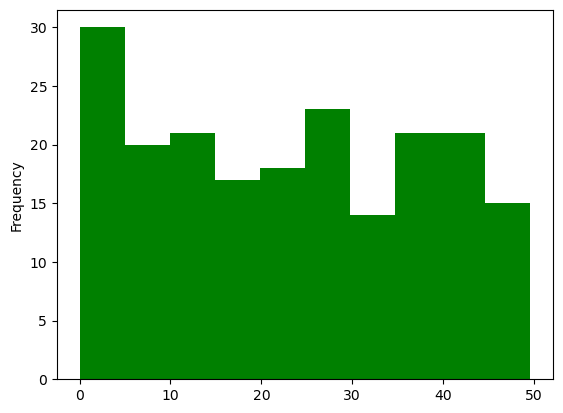

In [20]:
sales_data['Radio'].plot.hist(bins=10, color='green',xlabel='Radio')

<Axes: ylabel='Frequency'>

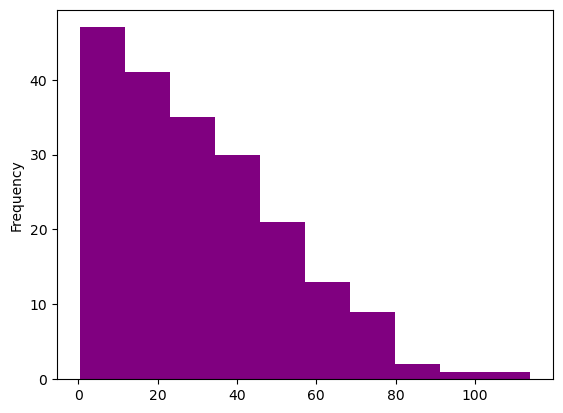

In [21]:
sales_data['Newspaper'].plot.hist(bins=10, color='purple',xlabel='newspaper')

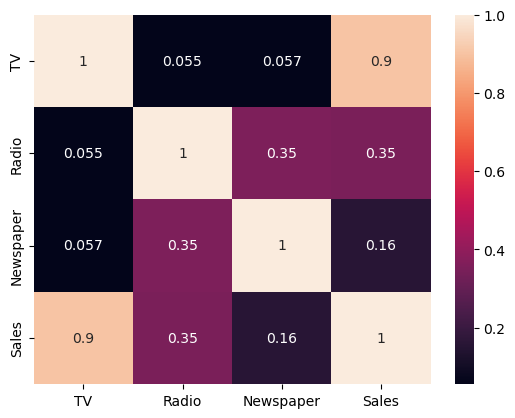

In [22]:
sns.heatmap(sales_data.corr(),annot=True)
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sales_data[['TV']],sales_data[['Sales']])

In [24]:
print(X_train)

        TV
47   239.9
185  205.0
38    43.1
117   76.4
137  273.7
..     ...
91    28.6
146  240.1
37    74.7
19   147.3
105  137.9

[150 rows x 1 columns]


In [25]:
print(y_train)

     Sales
47    23.2
185   22.6
38    10.1
117    9.4
137   20.8
..     ...
91     7.3
146   18.2
37    14.7
19    14.6
105   15.0

[150 rows x 1 columns]


In [27]:
print(X_test)
print('\n',y_test)

        TV
7    120.2
20   218.4
2     17.2
162  188.4
160  172.5
167  206.8
174  222.4
171  164.5
35   290.7
52   216.4
144   96.2
28   248.8
129   59.6
182   56.2
65    69.0
196   94.2
139  184.9
72    26.8
89   109.8
135   48.3
145  140.3
41   177.0
75    16.9
149   44.7
177  170.2
120  141.3
43   206.9
90   134.3
5      8.7
165  234.5
187  191.1
64   131.1
17   281.4
178  276.7
71   109.8
46    89.7
176  248.4
104  238.2
131  265.2
81   239.8
153  171.3
77   120.5
94   107.4
122  224.0
42   293.6
50   199.8
183  287.6
58   210.8
155    4.1
11   214.7

      Sales
7     13.2
20    18.0
2     12.0
162   19.9
160   16.4
167   17.2
174   16.5
171   17.5
35    17.8
52    22.6
144   12.3
28    18.9
129    9.7
182    8.7
65    11.3
196   14.0
139   20.7
72     8.8
89    16.7
135   11.6
145   10.3
41    17.1
75     8.7
149   10.1
177   16.7
120   15.5
43    17.9
90    14.0
5      7.2
165   16.9
187   17.3
64    16.0
17    24.4
178   16.8
71    12.4
46    10.6
176   20.2
104   20.7
131   17

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [29]:
prediction = model.predict(X_test)
print(prediction)

[[13.68378549]
 [19.36415268]
 [ 7.72576288]
 [17.62880629]
 [16.7090727 ]
 [18.69315207]
 [19.5955322 ]
 [16.24631366]
 [23.54633749]
 [19.24846292]
 [12.29550837]
 [21.12263702]
 [10.17838578]
 [ 9.98171319]
 [10.72212765]
 [12.17981862]
 [17.42634921]
 [ 8.28107372]
 [13.08219874]
 [ 9.52473864]
 [14.84646757]
 [16.96937466]
 [ 7.70840941]
 [ 9.31649707]
 [16.57602948]
 [14.90431245]
 [18.69893656]
 [14.49939829]
 [ 7.2340814 ]
 [20.29545524]
 [17.78498746]
 [14.31429468]
 [23.0083801 ]
 [22.73650917]
 [13.08219874]
 [11.91951666]
 [21.09949907]
 [20.5094813 ]
 [22.07129305]
 [20.60203311]
 [16.63965884]
 [13.70113895]
 [12.94337103]
 [19.68808401]
 [23.71408764]
 [18.28823792]
 [23.36701836]
 [18.92453159]
 [ 6.96799495]
 [19.15012662]]


In [30]:
model.coef_

array([[0.05784488]])

In [31]:
model.intercept_

array([6.73083094])

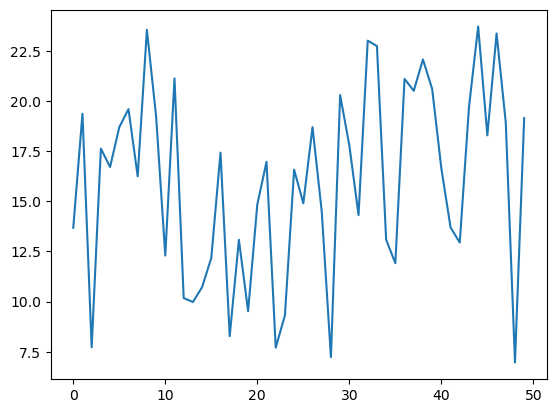

In [32]:
plt.plot(prediction)

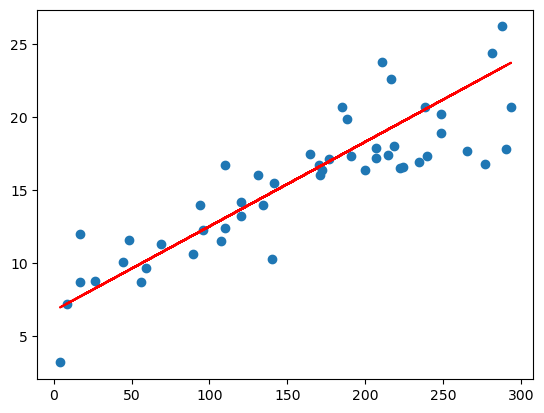

In [34]:
plt.scatter(X_test,y_test)
plt.plot(X_test, 6.73083094 + 0.05784488 * X_test, 'r' )
plt.show()